In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Material classification

Neutron scattering can give complementary information about materials, such as the structural information from diffraction and electronic information from spectroscopy. 
In this exercise, we will look at using a random forest classification of structural and electronic information to create a model that can guess the [space group](https://en.wikipedia.org/wiki/Space_group) for new materials.

The first thing that we need is some data, I have obtained data for lithium, sodium, and potassium containing materials of the four most common space groups ([space group numbers](https://en.wikipedia.org/wiki/List_of_space_groups): 2, 14, 15, 19). 
This data can be found in the file [`materials_data.csv`](.lik). 

In [2]:
data = pd.read_csv('materials_data.csv')

This data is read in as a `pandas.DataFrame` so it can be visualised as so. 

In [3]:
data

,pretty_formula,spacegroup.number,band_gap,density,volume,formation_energy_per_atom,nsites
0,KAl9O14,14,4.1426,3.142646,534.648960,-3.364229,48
1,K2Se2O,15,0.0975,3.303683,253.443517,-0.940536,10
2,K2AgF4,14,0.6151,3.343987,260.263084,-2.371859,14
3,Na2TeS3,14,1.7919,2.904619,616.908734,-1.000993,24
4,K3Zn2Cl7,2,3.9024,2.345705,702.644832,-1.909423,24
...,...,...,...,...,...,...,...
537,Na2Cr2O7,2,2.5253,2.654095,655.601817,-1.869509,44
538,K4SnO4,2,2.3423,2.977324,378.252471,-1.839865,18
539,LiTa3O8,15,3.3841,7.889695,285.303789,-3.263699,24
540,LiSmO2,14,3.7655,6.485182,193.881819,-3.185751,16


The first thing to do is separate our data into training and validation data (this process is common in machine learning methods). 
For this we will use the `scikit-learn` function `train_test_split`. 

In [4]:
train, validate = train_test_split(data, test_size=0.2)

We have split the data, which consisted of data about 542 materials, so that 80 % will be used to train and the remaining 20 % is reserved for validation. 

In [5]:
train

,pretty_formula,spacegroup.number,band_gap,density,volume,formation_energy_per_atom,nsites
29,Na2CS3,15,1.2757,1.911615,267.868364,-0.806030,12
219,Na2Si3O7,15,4.9429,3.182597,252.771810,-2.914804,24
149,K2Te2O5,14,3.3858,4.004232,685.730691,-1.788456,36
380,K3Ta2S11,15,1.6765,3.078357,1794.998822,-1.306436,64
394,KSbS2,15,1.9033,2.996772,249.336175,-1.070781,8
...,...,...,...,...,...,...,...
247,LiDy2Br5,15,0.1222,5.617942,432.407262,-1.441083,16
437,K2PSe3,14,1.9047,2.896659,1587.015173,-0.820340,48
426,Li4Ge5O12,2,2.9164,4.429880,437.042335,-2.232459,42
64,K4Fe2O5,14,0.7772,2.977457,388.251310,-1.079104,22


In [6]:
validate

,pretty_formula,spacegroup.number,band_gap,density,volume,formation_energy_per_atom,nsites
201,LiLaO2,14,3.8908,5.558972,212.499025,-3.180173,16
83,Na2TeSe3,15,1.3504,3.922704,695.014564,-0.632115,24
40,Na4GeO4,2,2.8182,2.991720,253.762881,-2.027865,18
87,Na3W3Cl13,14,0.9180,3.825353,1877.652766,-1.552576,76
387,KSbO2,15,2.1412,3.982665,160.820315,-1.894347,8
...,...,...,...,...,...,...,...
93,Na2Si4O9,14,4.4699,2.989549,2015.051037,-3.000153,180
33,K5SnBi3,14,0.0145,4.095423,1526.391127,-0.349438,36
248,KAuI4,14,0.3003,4.778721,1033.677665,-0.552724,24
172,K2B2Se7,15,1.6404,3.488650,621.194854,-0.511941,22


We then define the columns of interest and segment our data into the `X` and `y` elements. 

In [7]:
columns = ['band_gap', 'formation_energy_per_atom']
X_train = train[columns]
y_train = train['spacegroup.number']
X_validate = validate[columns]
y_validate = validate['spacegroup.number']

With the data split up, we can define our random forest model. 

In [8]:
model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

Let's see how well our model managed to classify the validation data?

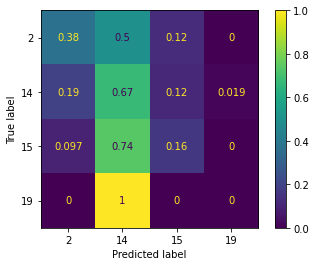

In [9]:
plot_confusion_matrix(model, X_validate, y_validate, normalize='true')
plt.show()

The confusion matrix allows us to compare the actual space group of the validation data, with that from the classification. 
For a perfect classification, you would have an [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix) with the dimension of the number of labels. 

## Exercise

It is clear from the above confusion matrix, that our current selection of columns of interest is not sufficient to accurately classify the data. 
In this exercise, you should try different combinations of the columns of interest to see which give the best classification of the space group for these materials. 